In [1]:
import anfis
import membership.mfDerivs
import membership.membershipfunction
import numpy as np
import matplotlib.pyplot as plt

ts = np.load(
    "C:/Users/Esteban/Documents/Escuela/Robotica/Fuzzy/anfis/anfis/datos.npy")[:-10]

# Normalize
#ts = ts / ts.max(axis=0)

# Datos

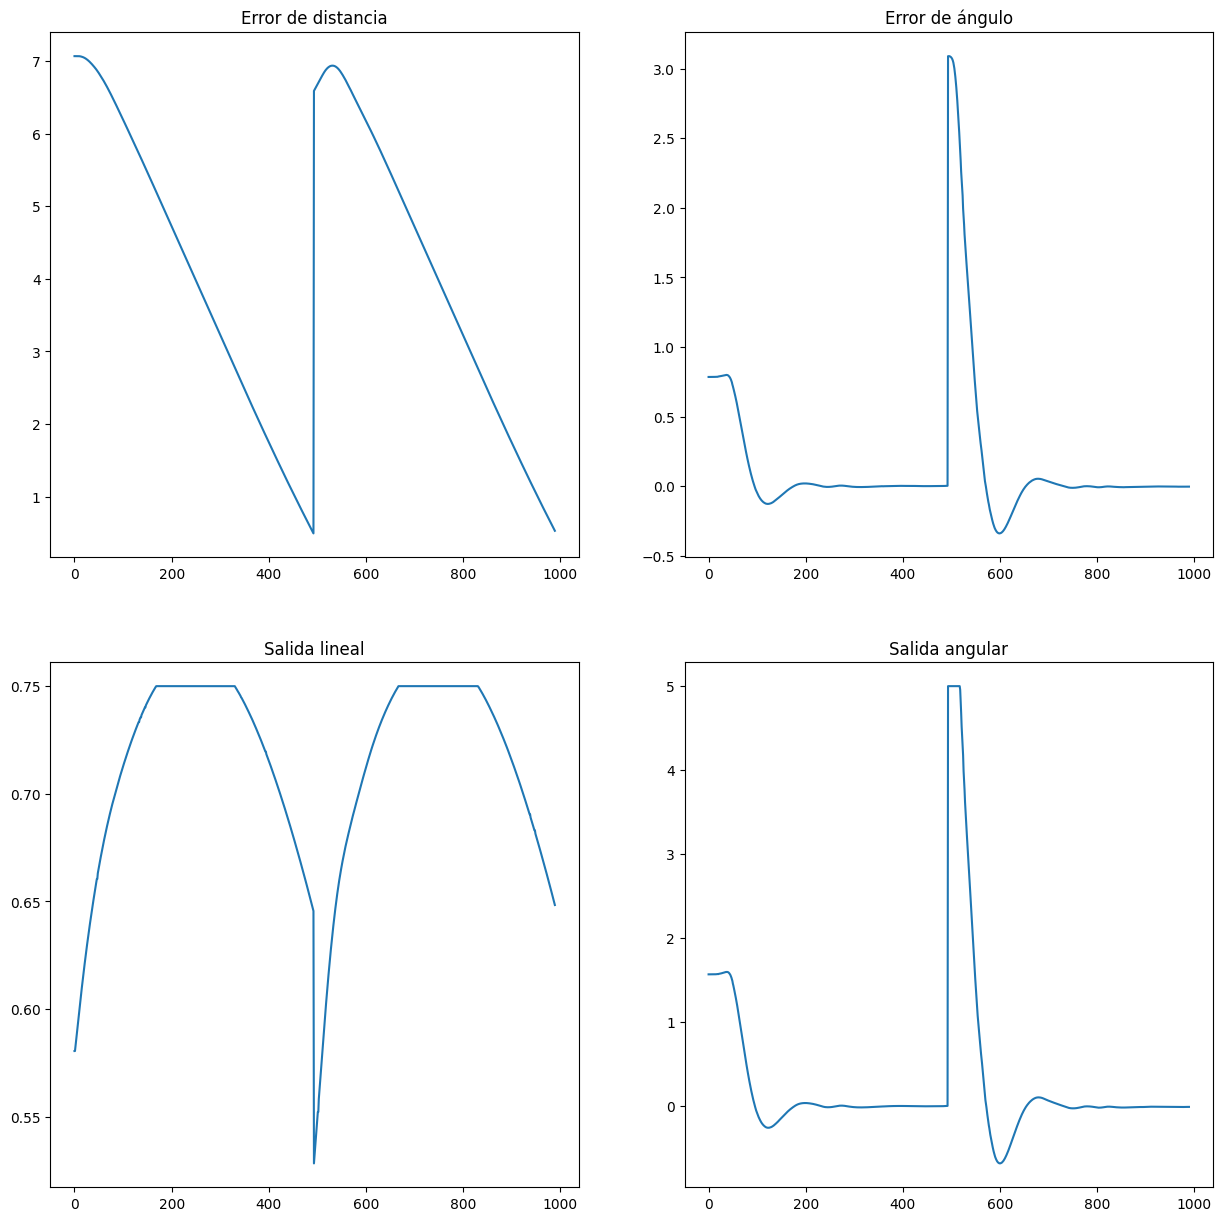

In [2]:


plt.subplots_adjust()
plt.subplot(2, 2, 1)
plt.plot(ts[:, 0])
plt.title("Error de distancia")

plt.subplot(2, 2, 2)
plt.plot(ts[:, 1])
plt.title("Error de ángulo")

plt.subplot(2, 2, 3)
plt.plot(ts[:, 2])
plt.title("Salida lineal")

plt.subplot(2, 2, 4)
plt.plot(ts[:, 3])
plt.title("Salida angular")


plt.gcf().set_size_inches(15, 15)
plt.show()

# Generador de pruebas

In [38]:
def test(X, Y, mfs, type, epochs=20, print_mfs = False, k = 0.0005):
	nx = np.linspace(np.min(X), np.max(X), mfs)
	ny = np.linspace(min(Y), max(Y), mfs)

	mfx = []
	mfy = []

	for i in range(mfs):
		if type == "gaussmf":
			mfx.append(['gaussmf', {'mean': np.round(nx[i], 1),
					'sigma': np.round((np.max(X)-np.min(X))/2, 1)}])
			mfy.append(['gaussmf', {'mean': np.round(ny[i], 1),
					'sigma': np.round((max(Y)-min(Y))/2, 1)}])
		elif type == "gbellmf":
			mfx.append(['gbellmf', {'a': 1, 'b': 1, 'c': np.round(nx[i], 1)}])
			mfy.append(['gbellmf', {'a': 1, 'b': 1, 'c': np.round(ny[i], 1)}])
		elif type == "sigmf":
			mfx.append(['sigmf', {'b': np.round(nx[i], 1), 'c': 1}])
			mfy.append(['sigmf', {'b': np.round(ny[i], 1), 'c': 1}])
			
	mf = [mfx, mfy]

	mfc = membership.membershipfunction.MemFuncs(mf)

	anf = anfis.ANFIS(X, Y, mfc)

	anf.trainHybridJangOffLine(epochs=epochs, k = k, print_mfs = print_mfs)

	print("Plotting errors")
	anf.plotErrors()
	print("Plotting results")
	anf.plotResults()

	return anf, mf


# Controlador Angular

In [4]:
X = ts[:, 0:2]
Y = ts[:, 3]

## Gaussian MFs

### 3 MFs

1) MSEe: 0.43745666020148954
2) MSEe: 0.25774050393854264
3) MSEe: 0.27251412449376083
4) MSEe: 0.2688375814648011
5) MSEe: 0.264172915428516
6) MSEe: 0.2586404446260323
7) MSEe: 0.25148923219100344
8) MSEe: 0.2423684014673081
9) MSEe: 0.23106306231227386
10) MSEe: 0.21758845773933852
11) MSEe: 0.20221423475981118
12) MSEe: 0.18552021624516357
13) MSEe: 0.16895718602441218
14) MSEe: 0.15749716078785778
15) MSEe: 0.17123781181028616
16) MSEe: 0.18900122025205146
17) MSEe: 0.1933450668943007
18) MSEe: 0.18042302619720813
19) MSEe: 0.19278502001559383
Min error: 0.15749716078785778 at epoch 14
Plotting errors


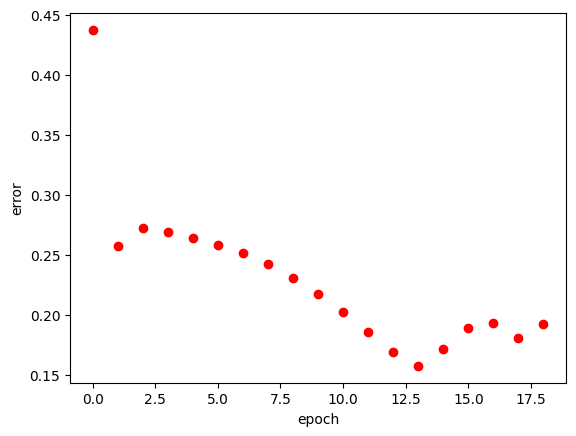

Plotting results


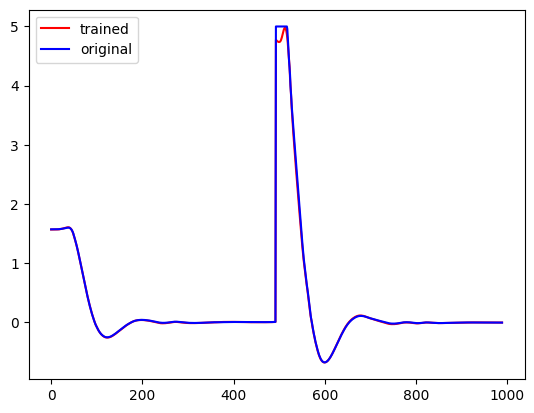

In [45]:
test(X, Y, 3, "gaussmf", k = 0.1)

### 4 MFs

1) MSEe: 0.5784815200766498
2) MSEe: 0.5395626452475721
3) MSEe: 0.5082920361339976
4) MSEe: 0.48171995111111526
5) MSEe: 0.4557224829419841
6) MSEe: 0.42875474756104004
7) MSEe: 0.39807833919258595
8) MSEe: 0.3599677865471235
9) MSEe: 0.31256297906853214
10) MSEe: 0.26070315827611795
11) MSEe: 0.2148517107819522
12) MSEe: 0.1840753072165138
13) MSEe: 0.174065536101858
14) MSEe: 0.18211824565125945
15) MSEe: 0.1822724885776399
16) MSEe: 0.22584250108794726
17) MSEe: 0.1261768868850319
18) MSEe: 0.11755071522276991
19) MSEe: 0.17105759701374568
Min error: 0.11755071522276991 at epoch 18
Plotting errors


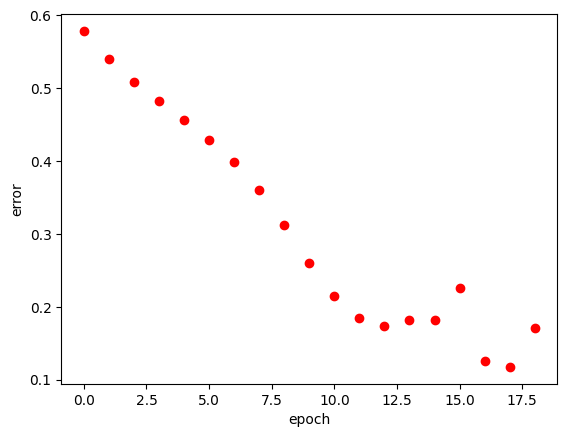

Plotting results


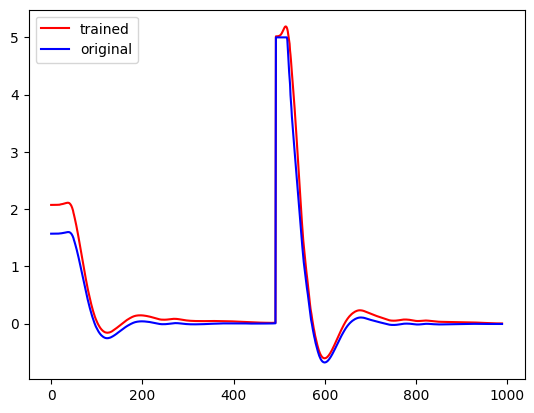

In [51]:
test(X, Y, 4, "gaussmf", k = 0.15)


### 5 MFs

1) MSEe: 0.7838636653600752
2) MSEe: 0.5087842423650041
3) MSEe: 0.3481737211494206
4) MSEe: 0.23125694774653946
5) MSEe: 0.19064484136055493
6) MSEe: 0.15420031279346963
7) MSEe: 0.15570325805837437
8) MSEe: 0.18555179731055124
9) MSEe: 0.1807580745506493
10) MSEe: 0.1718257685222018
11) MSEe: 0.15051384534129272
12) MSEe: 0.1587634472709527
13) MSEe: 0.20468907695808264
14) MSEe: 0.17140343405155695
15) MSEe: 0.1850134109390289
16) MSEe: 0.15830021569990205
17) MSEe: 0.177229476405331
18) MSEe: 0.22052615748752652
19) MSEe: 0.5611337042080929
Min error: 0.15051384534129272 at epoch 11
Plotting errors


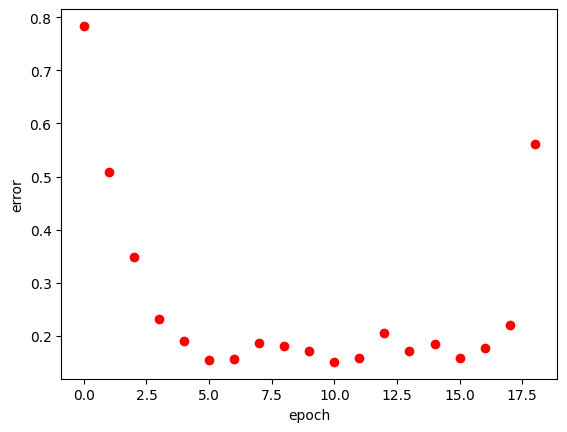

Plotting results


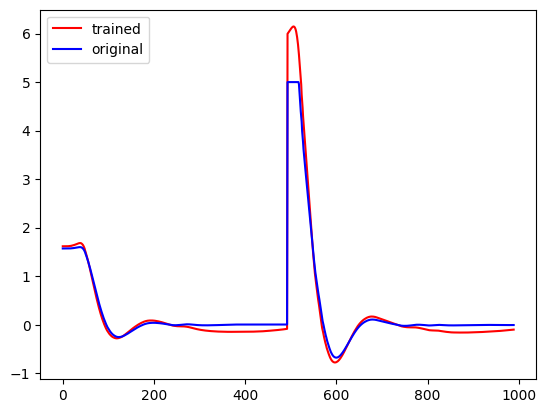

In [54]:
test(X, Y, 5, "gaussmf", k = 0.5)


## Generalized Bell MFs

### 3 MFs

1) MSEe: 0.15975919056859733
2) MSEe: 0.1536729665792907
3) MSEe: 0.15415676762899932
4) MSEe: 0.16112252351052098
5) MSEe: 0.1609576536035268
6) MSEe: 0.1601475146139012
7) MSEe: 0.15929770526733986
8) MSEe: 0.15835987712174562
9) MSEe: 0.15734037164567938
10) MSEe: 0.1562483597043514
11) MSEe: 0.1550952339743534
12) MSEe: 0.15389624544105868
13) MSEe: 0.1526706382954739
14) MSEe: 0.1514383694322007
15) MSEe: 0.150225042606614
16) MSEe: 0.14906595443628254
17) MSEe: 0.1480251697629107
18) MSEe: 0.14725766063307086
19) MSEe: 0.14716234400920505
Min error: 0.14716234400920505 at epoch 19
Plotting errors


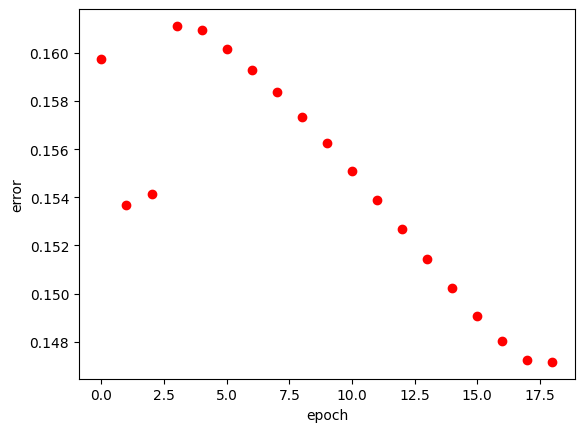

Plotting results


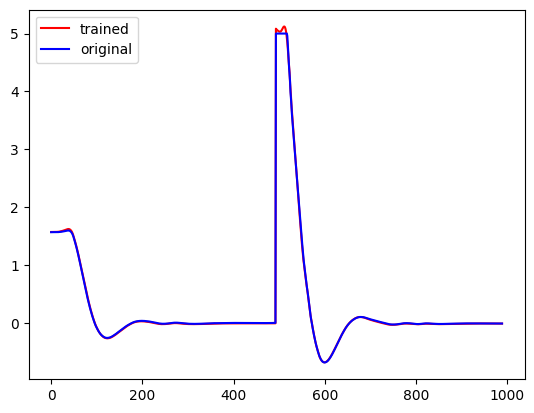

In [30]:
test(X, Y, 3, "gbellmf", k = 0.048)


### 4 MFs

1) MSEe: 0.16875835235695838
2) MSEe: 0.1698976557567003
3) MSEe: 0.17101720439288162
4) MSEe: 0.17210776941829567
5) MSEe: 0.1731582354804302
6) MSEe: 0.1741546746060275
7) MSEe: 0.17507930161453278
8) MSEe: 0.17590891177213416
9) MSEe: 0.17660987791585758
10) MSEe: 0.17712741711861182
11) MSEe: 0.17738600332875987
12) MSEe: 0.1772334499438816
13) MSEe: 0.17629769649216034
14) MSEe: 0.17327457937037344
15) MSEe: 0.15304439161351008
16) MSEe: 0.1938692609783862
17) MSEe: 0.19398579669553973
18) MSEe: 0.19346973348669985
19) MSEe: 0.19263273922469798
Min error: 0.15304439161351008 at epoch 15
Plotting errors


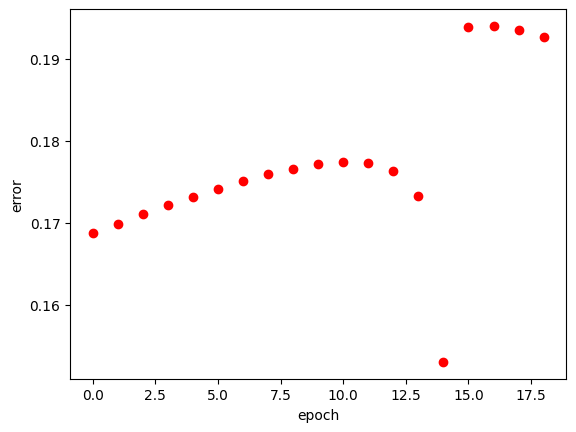

Plotting results


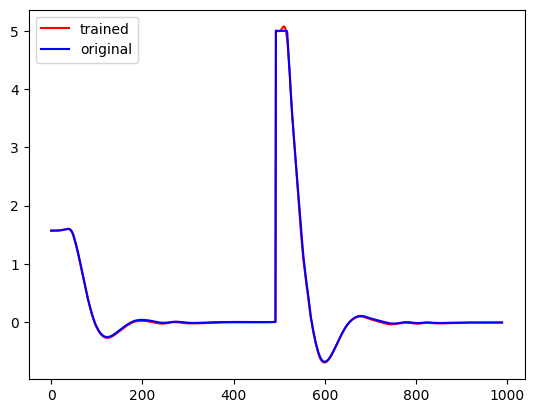

In [59]:
test(X, Y, 4, "gbellmf", k = 0.06)

### 5 MFs

1) MSEe: 0.11477520846475131
2) MSEe: 0.11947994742568119
3) MSEe: 0.12774336995617702
4) MSEe: 0.1398389381832933
5) MSEe: 0.13906395783509123
6) MSEe: 0.1375494172204278
7) MSEe: 0.13811069314891333
8) MSEe: 0.13205246926712144
9) MSEe: 0.12335161206026253
10) MSEe: 0.10388675501897081
11) MSEe: 0.10945406438727272
12) MSEe: 0.07596384749434695
13) MSEe: 0.10984874001964197
14) MSEe: 0.13114437452729955
15) MSEe: 0.12972543466761535
16) MSEe: 0.12914468932898904
17) MSEe: 0.12935115023720456
18) MSEe: 0.19427615641972634
19) MSEe: 0.19845544259305928
Min error: 0.07596384749434695 at epoch 12
Plotting errors


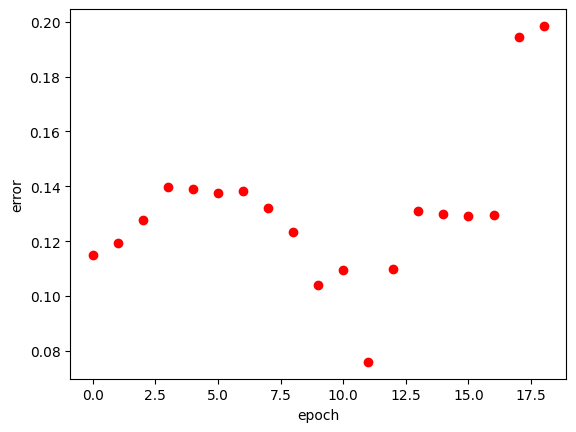

Plotting results


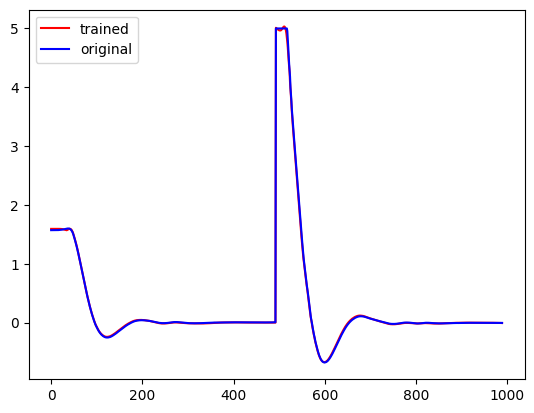

In [5]:
test(X, Y, 5, "gbellmf", k = 0.3)

## Sigmoid MFs

### 3 MFs

1) MSEe: 0.33000433719991906
2) MSEe: 0.3333310887466986
3) MSEe: 0.3338384429964344
4) MSEe: 0.3340633846985957
5) MSEe: 0.33409652460086137
6) MSEe: 0.3339857885631826
7) MSEe: 0.33376297191082716
8) MSEe: 0.3334519408969397
9) MSEe: 0.3330329218107348
10) MSEe: 0.33250170026681736
11) MSEe: 0.3318576604644018
12) MSEe: 0.33110457471110816
13) MSEe: 0.33025084699003393
14) MSEe: 0.32930871669897577
15) MSEe: 0.32829202971068555
16) MSEe: 0.32721359074115597
17) MSEe: 0.3260864104280743
18) MSEe: 0.32493172519759866
19) MSEe: 0.32378447634780716
Min error: 0.32378447634780716 at epoch 19
Plotting errors


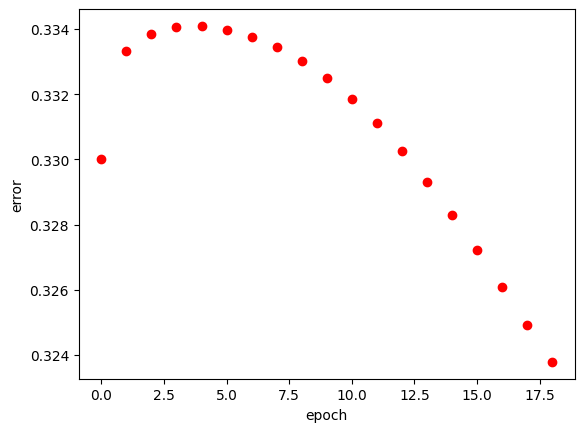

Plotting results


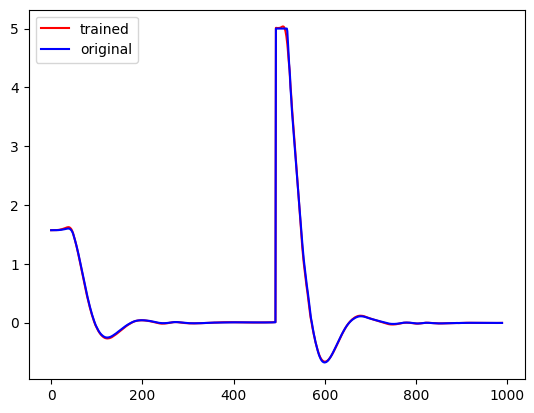

In [19]:
test(X, Y, 3, "sigmf", k = 0.04)

### 4 MFs

1) MSEe: 0.3539207314199767
2) MSEe: 0.3364636437962081
3) MSEe: 0.3106680618239615
4) MSEe: 0.2771410464192584
5) MSEe: 0.26297798204989087
6) MSEe: 0.2521927694336972
7) MSEe: 0.24398188112995553
8) MSEe: 0.236734565085867
9) MSEe: 0.2298139805394443
10) MSEe: 0.22333714288941112
11) MSEe: 0.21788739032106486
12) MSEe: 0.21416263145386108
13) MSEe: 0.21225920637534598
14) MSEe: 0.21042011053487017
15) MSEe: 0.20572471339083923
16) MSEe: 0.19570073719237818
17) MSEe: 0.1720900548891705
18) MSEe: 0.14487182876443425
19) MSEe: 0.1396430583578811
Min error: 0.1396430583578811 at epoch 19
Plotting errors


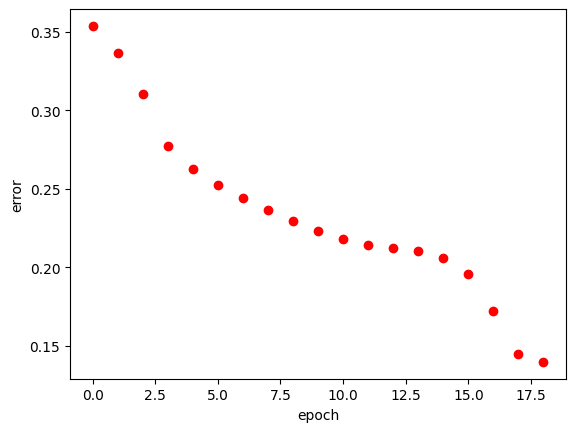

Plotting results


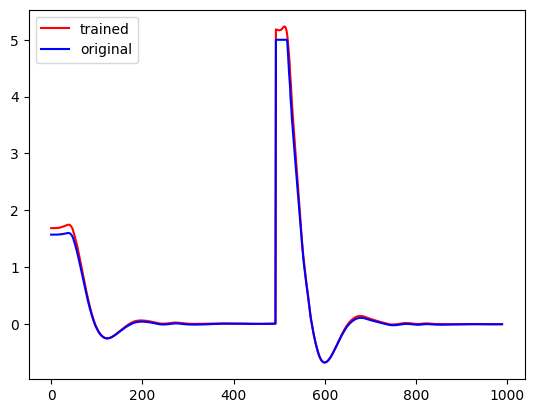

In [20]:
test(X, Y, 4, "sigmf", k = 0.1)

### 5 MFs

1) MSEe: 0.3112897485000003
2) MSEe: 0.3322224973701322
3) MSEe: 0.4485052724858938
4) MSEe: 0.421713476352875
5) MSEe: 0.39396786978303033
6) MSEe: 0.3657275114964638
7) MSEe: 0.3367187821103167
8) MSEe: 0.3112964207079003
9) MSEe: 0.289392652109222
10) MSEe: 0.26432771037050856
11) MSEe: 0.28512868685947457
12) MSEe: 0.27910604050942406
13) MSEe: 0.2731480532304388
14) MSEe: 0.2642451447112783
15) MSEe: 0.26438136336056345
16) MSEe: 0.2538123440453879
17) MSEe: 0.2517237987459029
18) MSEe: 0.22544647804338502
19) MSEe: 0.2161776165090748
Min error: 0.2161776165090748 at epoch 19
Plotting errors


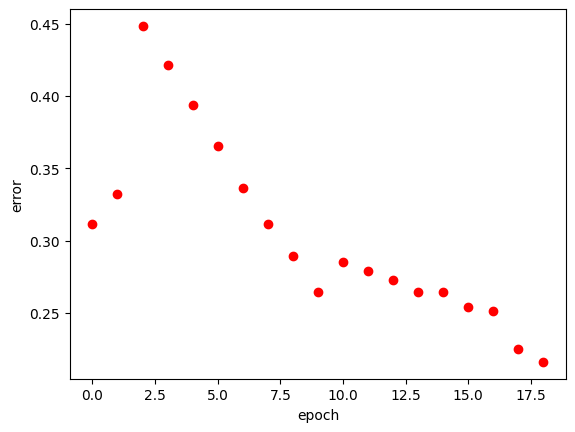

Plotting results


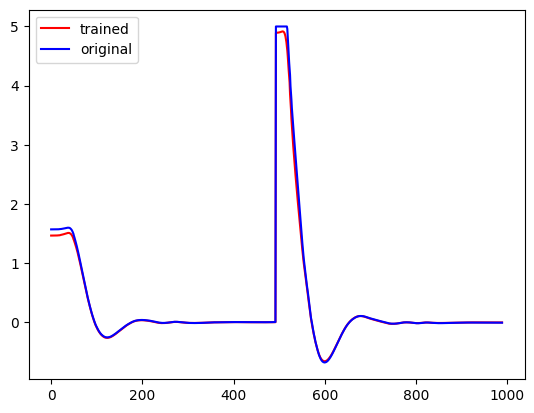

In [26]:
test(X, Y, 5, "sigmf", k = 0.1)


# Análisis de resultados

Los resultados de las pruebas previamente realizadas fueron los siguientes

| Tipo | # de MFs | k óptimo | MSE mínimo | Épocas óptimas |
| --- | --- | --- | --- | --- |
| Gauss | 3 | 0.1 | 0.1574 | 14
| Gauss | 4 | 0.15 | 0.1175 | 18
| Gauss | 5 | 0.5 | 0.1505 | 11
| Bell | 3 | 0.048 | 0.1471 | 19
| Bell | 4 | 0.06 | 0.1530 | 15
| Bell | 5 | 0.3 | 0.0759 | 12
| Sigmoid | 3 | 0.04 | 0.3237 | 19
| Sigmoid | 4 | 0.1 | 0.1396 | 19
| Sigmoid | 5 | 0.1 | 0.21 |  19

1) MSEe: 0.11477520846475131
2) MSEe: 0.11947994742568119
3) MSEe: 0.12774336995617702
4) MSEe: 0.1398389381832933
5) MSEe: 0.13906395783509123
6) MSEe: 0.1375494172204278
7) MSEe: 0.13811069314891333
8) MSEe: 0.13205246926712144
9) MSEe: 0.12335161206026253
10) MSEe: 0.10388675501897081
11) MSEe: 0.10945406438727272
12) MSEe: 0.07596384749434695
Min error: 0.07596384749434695 at epoch 12
Plotting errors


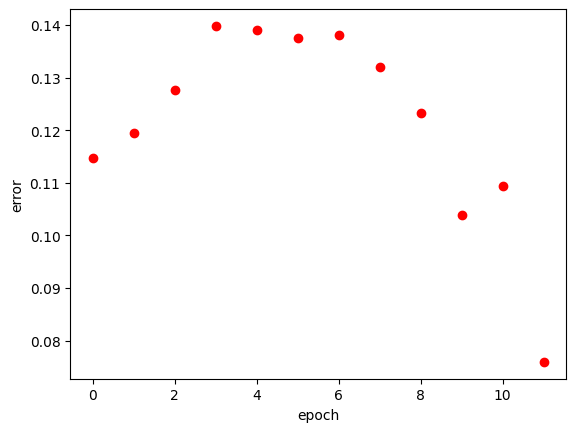

Plotting results


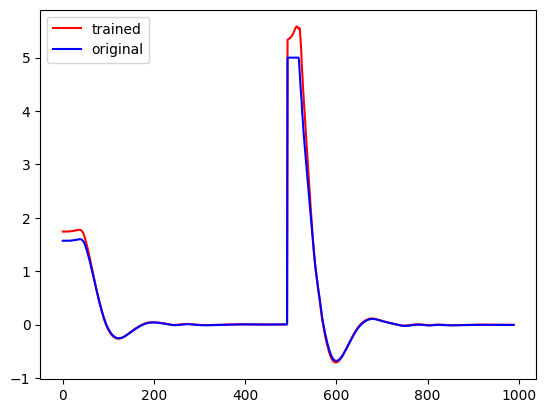

In [39]:
optim_anf, optim_mf = test(X, Y, 5, "gbellmf", epochs = 13, k = 0.3)


In [43]:
optim_anf.plotMF(X, 0)
optim_anf.plotMF(Y, 1)


IndexError: list index out of range